Recall of our target.  We want to measure the proportion of actual attrition cases correctly.  Most who are likely to leave are identified.  
Cost of a False Negative-if our model misses an emplloyee who is likely to leave, we lose an employee without taking preventative actions.    
* Potential lost talent and experience
* Increasing HR costs for onboarding new employees  
Building a model with high recall ensures that at-risk employees are flagged, allowing the company to take preventative measures.  Building a model with high recall ensures that at-risk employees are flagged, allowing the company to take preventative measures.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hr_data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df = df.drop(columns=[
    'Over18',
    'EmployeeCount',
    'StandardHours',
    'EmployeeNumber'
    
])

In [6]:
df['YearsInCurrentRole_vs_YearsAtCompany'] = df['YearsInCurrentRole'] / df['YearsAtCompany']


In [7]:
# Create the new feature with division
df['YearsInCurrentRole_vs_YearsAtCompany'] = df['YearsInCurrentRole'] / df['YearsAtCompany']

# Replace NaN values with 0
df['YearsInCurrentRole_vs_YearsAtCompany'].fillna(0, inplace=True)

# Verify changes
print(df[['YearsInCurrentRole', 'YearsAtCompany', 'YearsInCurrentRole_vs_YearsAtCompany']].head())


   YearsInCurrentRole  YearsAtCompany  YearsInCurrentRole_vs_YearsAtCompany
0                   4               6                              0.666667
1                   7              10                              0.700000
2                   0               0                              0.000000
3                   7               8                              0.875000
4                   2               2                              1.000000


In [8]:
df['TotalYearsCurrentJob'] = df['YearsInCurrentRole'] + df['YearsWithCurrManager']


In [9]:
df['FrequentBusinessTravel'] = df['BusinessTravel'].apply(lambda x: 1 if x == 'Travel_Frequently' else 0)


In [10]:
df['JobEnvSatisfaction'] = df['JobSatisfaction'] + df['EnvironmentSatisfaction']


In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsInCurrentRole_vs_YearsAtCompany,TotalYearsCurrentJob,FrequentBusinessTravel,JobEnvSatisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,1,6,4,0,5,0.666667,9,0,6
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,3,3,10,7,1,7,0.700000,14,1,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,3,0,0,0,0,0.000000,0,0,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,8,7,3,0,0.875000,7,1,7
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,3,2,2,2,2,1.000000,4,0,3


In [12]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

* EDA
* Create some visualizations based on data     
* Try only oversampling to preserve data  
* Feature Engineering  
  * Scaling
  * Combining
  * Transform
  * Creating extra columns
* Outlier Detection  
* Correlation   

Models to build  

* Decision Tree Classifier
* KNN

In [13]:
att_age_group = df.groupby(['Attrition', 'Age'])
group_sizes = att_age_group.size()
print(group_sizes)


Attrition  Age
No         18      4
           19      3
           20      5
           21      7
           22     11
                  ..
Yes        52      3
           53      2
           55      3
           56      3
           58      5
Length: 82, dtype: int64


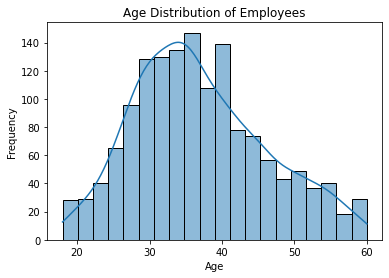

In [14]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

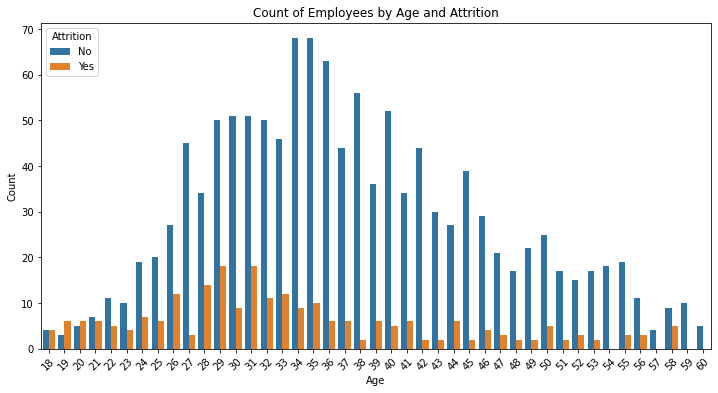

In [15]:
# Convert group_sizes to DataFrame for easier manipulation
group_sizes_df = group_sizes.reset_index(name='Count')

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=group_sizes_df, x='Age', y='Count', hue='Attrition')
plt.title('Count of Employees by Age and Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
att_gen_group = df.groupby(['Attrition', 'Gender'])
att_gen_group = att_gen_group.size()
print(att_gen_group)


Attrition  Gender
No         Female    501
           Male      732
Yes        Female     87
           Male      150
dtype: int64


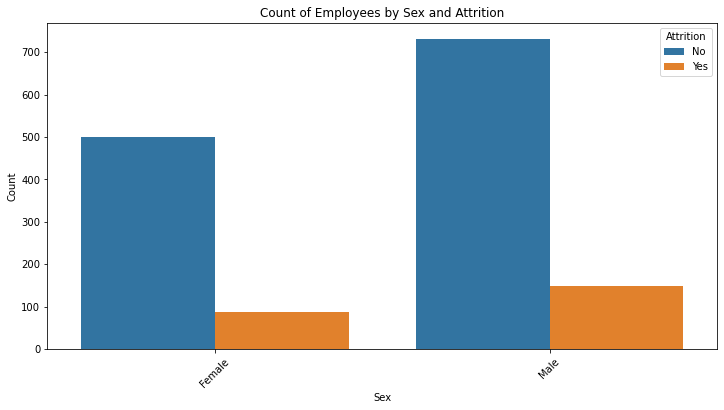

In [17]:
# Convert group_sizes to DataFrame for easier manipulation
att_gen_df = att_gen_group.reset_index(name='Count')

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=att_gen_df, x='Gender', y='Count', hue='Attrition')
plt.title('Count of Employees by Sex and Attrition')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

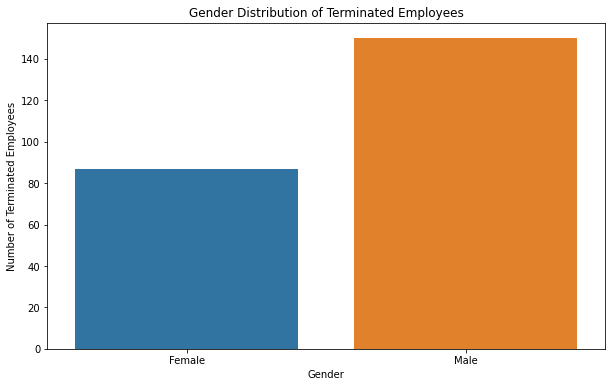

In [18]:
terminated_df = df[df['Attrition'] == 'Yes']

# Plot the gender distribution of terminated employees
plt.figure(figsize=(10, 6))
sns.countplot(data=terminated_df, x='Gender')
plt.title('Gender Distribution of Terminated Employees')
plt.xlabel('Gender')
plt.ylabel('Number of Terminated Employees')
plt.show()

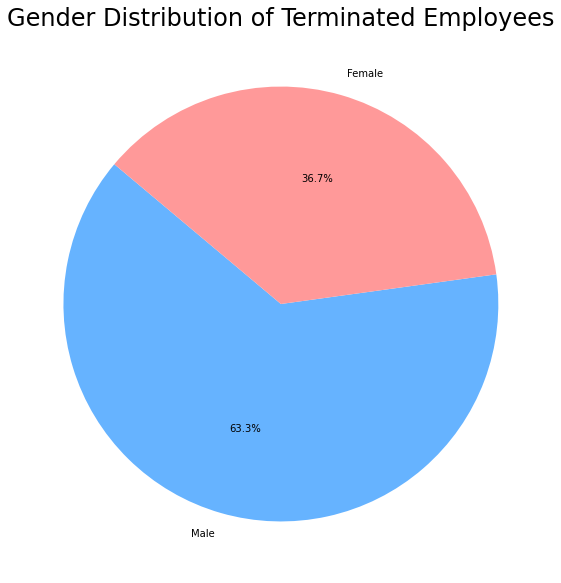

In [19]:
# Calculate the distribution of genders
gender_counts = terminated_df['Gender'].value_counts()

# Plot the gender distribution of terminated employees as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution of Terminated Employees', fontsize=24)

# Show the plot
plt.show()

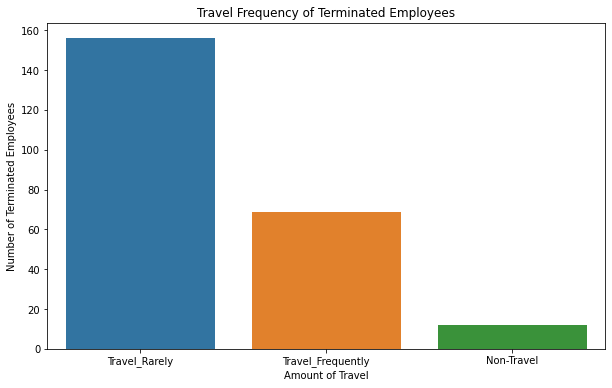

In [20]:
terminated_df = df[df['Attrition'] == 'Yes']

# Plot the gender distribution of terminated employees
plt.figure(figsize=(10, 6))
sns.countplot(data=terminated_df, x='BusinessTravel')
plt.title('Travel Frequency of Terminated Employees')
plt.xlabel('Amount of Travel')
plt.ylabel('Number of Terminated Employees')
plt.show()

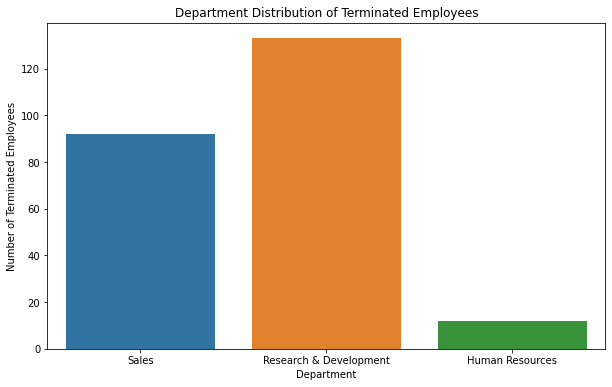

In [21]:
terminated_df = df[df['Attrition'] == 'Yes']

# Plot the gender distribution of terminated employees
plt.figure(figsize=(10, 6))
sns.countplot(data=terminated_df, x='Department')
plt.title('Department Distribution of Terminated Employees')
plt.xlabel('Department')
plt.ylabel('Number of Terminated Employees')
plt.show()

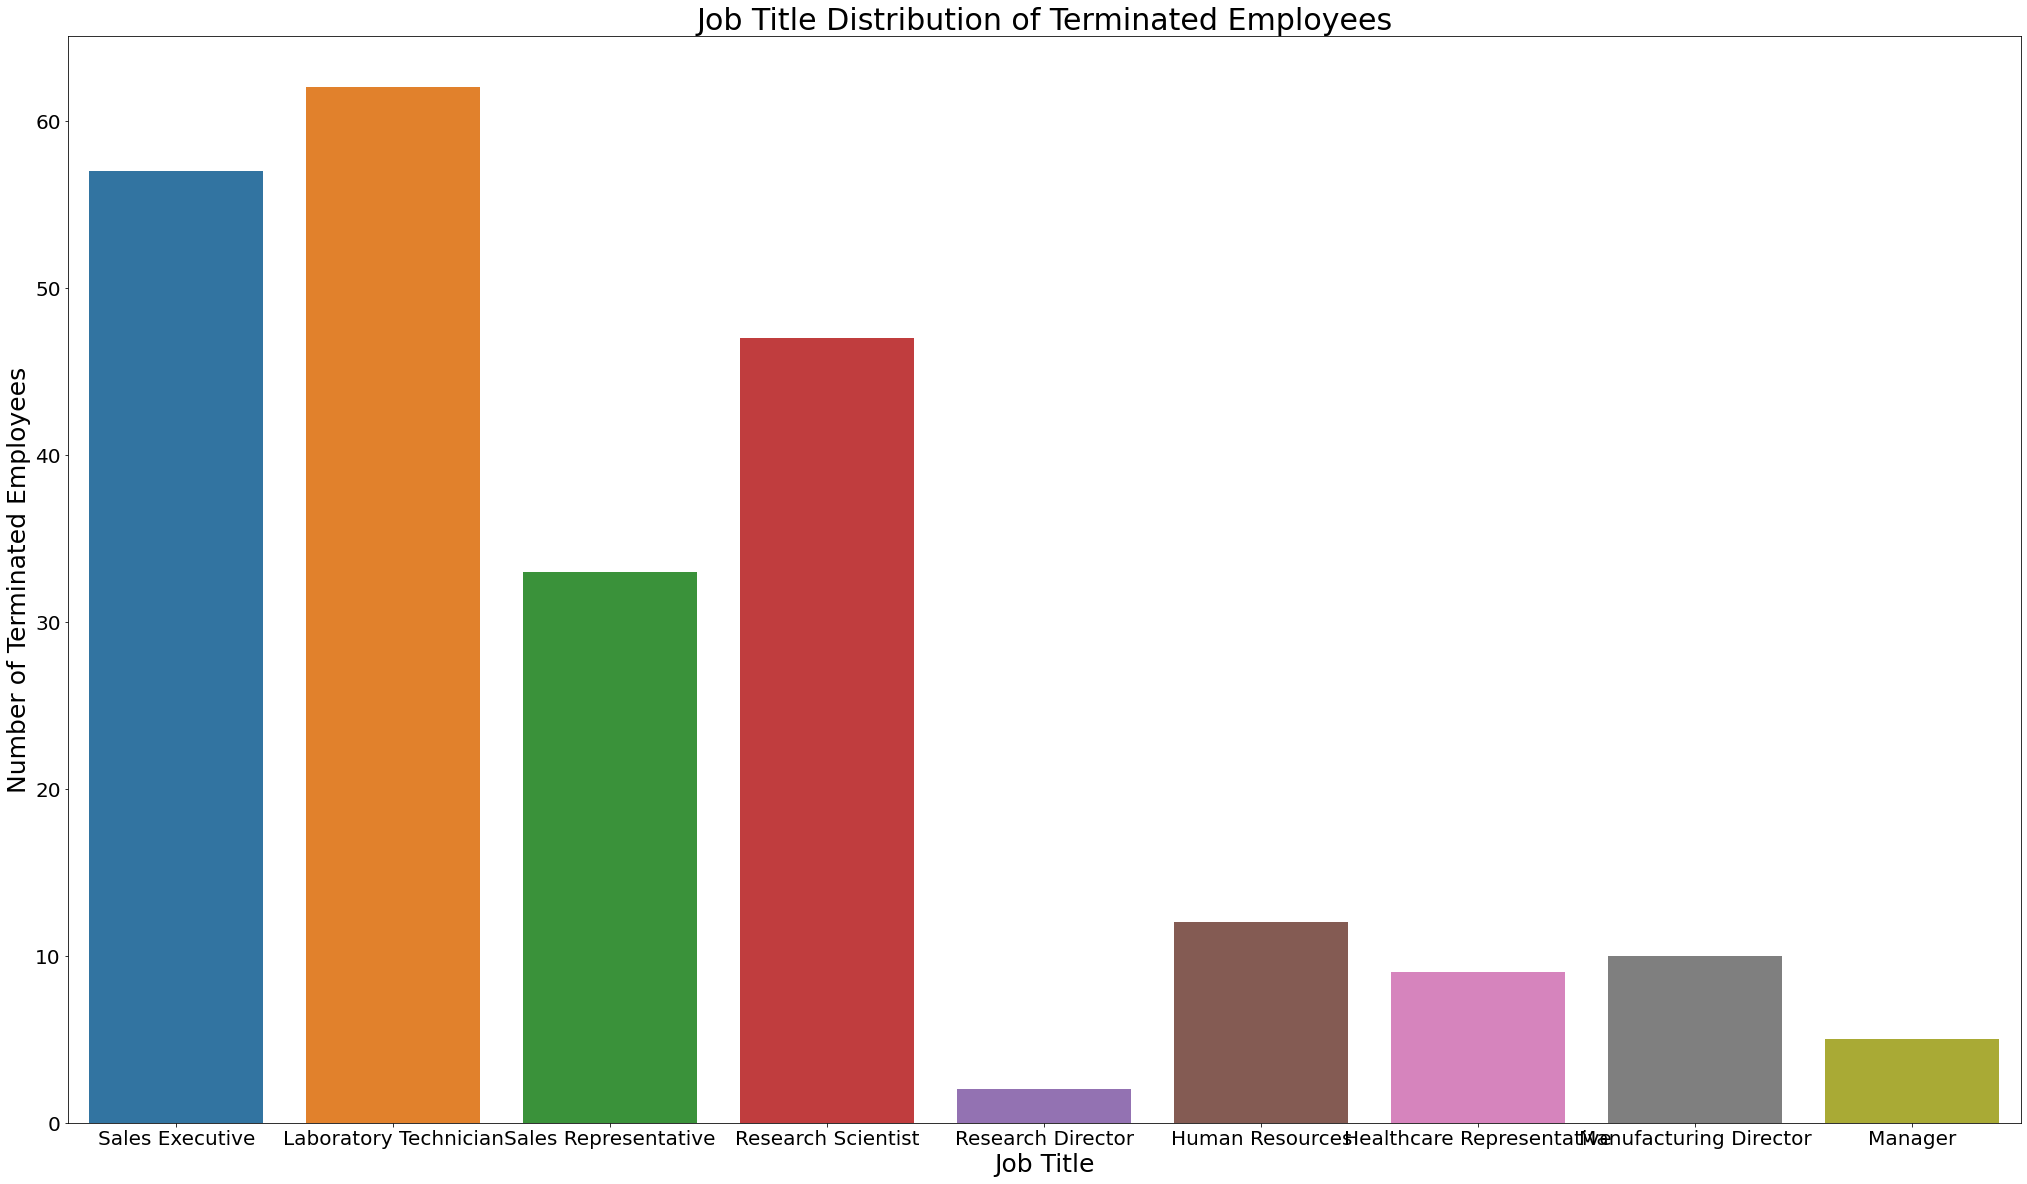

In [22]:


# Plot the gender distribution of terminated employees
plt.figure(figsize=(35, 20))
sns.countplot(data=terminated_df, x='JobRole')
plt.title('Job Title Distribution of Terminated Employees', fontsize=30)
plt.xlabel('Job Title', fontsize=25)
plt.ylabel('Number of Terminated Employees', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

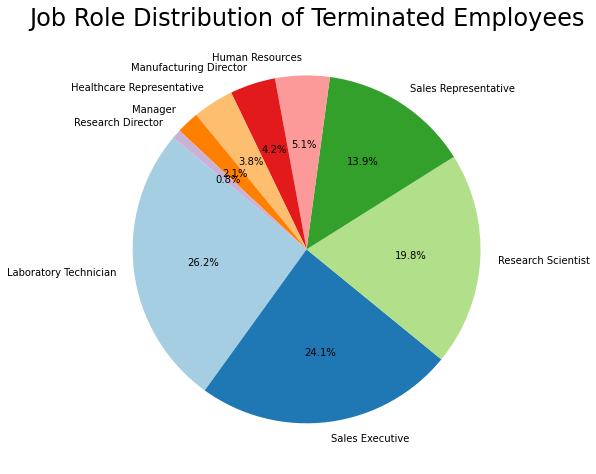

In [23]:
# Calculate the distribution of job roles
jobrole_counts = terminated_df['JobRole'].value_counts()

# Plot the job role distribution of terminated employees as a pie chart
plt.figure(figsize=(12, 8))
plt.pie(jobrole_counts, labels=jobrole_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Job Role Distribution of Terminated Employees', fontsize=24)

# Show the plot
plt.show()

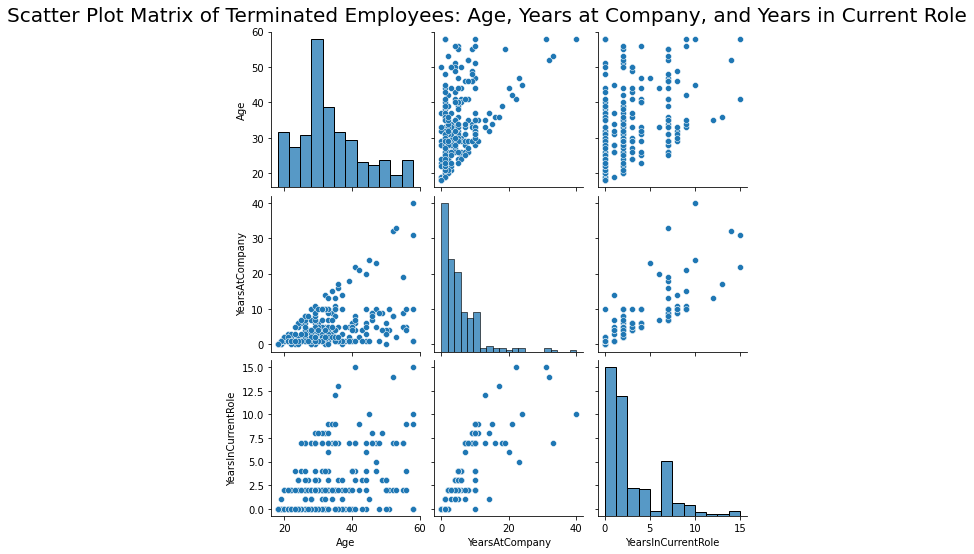

In [24]:
# Plot using pairplot
sns.pairplot(terminated_df[['Age', 'YearsAtCompany', 'YearsInCurrentRole']])
plt.suptitle('Scatter Plot Matrix of Terminated Employees: Age, Years at Company, and Years in Current Role', y=1.02, fontsize=20)
plt.show()

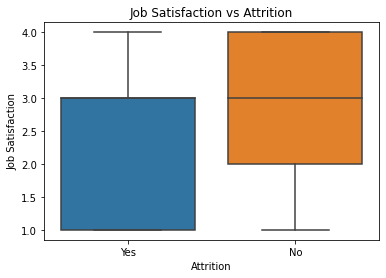

In [25]:
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()

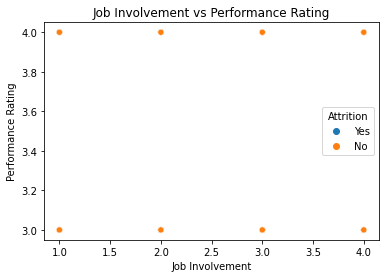

In [26]:
sns.scatterplot(data=df, x='JobInvolvement', y='PerformanceRating', hue='Attrition')
plt.title('Job Involvement vs Performance Rating')
plt.xlabel('Job Involvement')
plt.ylabel('Performance Rating')
plt.show()

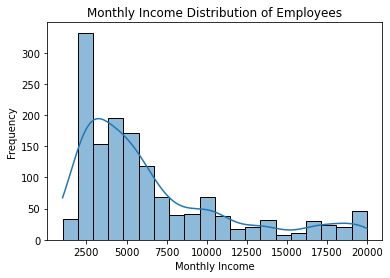

In [27]:
sns.histplot(df['MonthlyIncome'], bins=20, kde=True)
plt.title('Monthly Income Distribution of Employees')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

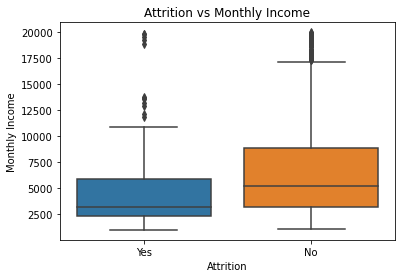

In [28]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Attrition vs Monthly Income')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

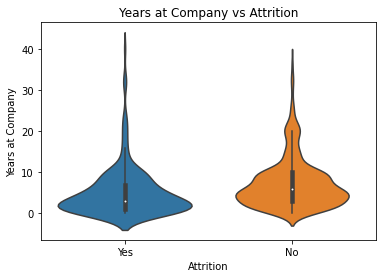

In [29]:
sns.violinplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('Years at Company vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

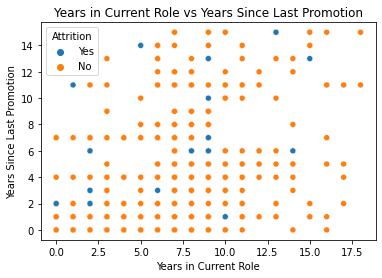

In [30]:
sns.scatterplot(data=df, x='YearsInCurrentRole', y='YearsSinceLastPromotion', hue='Attrition')
plt.title('Years in Current Role vs Years Since Last Promotion')
plt.xlabel('Years in Current Role')
plt.ylabel('Years Since Last Promotion')
plt.show()

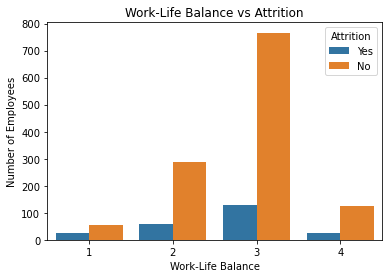

In [31]:
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title('Work-Life Balance vs Attrition')
plt.xlabel('Work-Life Balance')
plt.ylabel('Number of Employees')
plt.show()

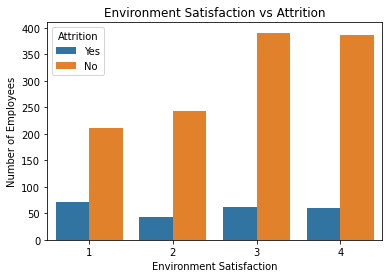

In [32]:
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition')
plt.title('Environment Satisfaction vs Attrition')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Number of Employees')
plt.show()

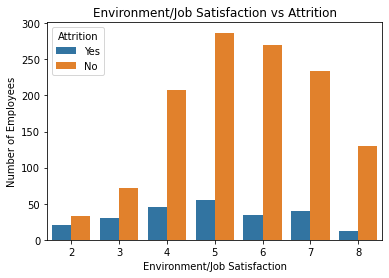

In [33]:
sns.countplot(data=df, x='JobEnvSatisfaction', hue='Attrition')
plt.title('Environment/Job Satisfaction vs Attrition')
plt.xlabel('Environment/Job Satisfaction')
plt.ylabel('Number of Employees')
plt.show()


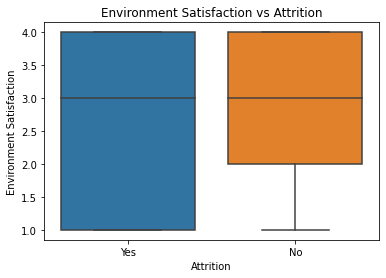

In [34]:
sns.boxplot(data=df, x='Attrition', y='EnvironmentSatisfaction')
plt.title('Environment Satisfaction vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Environment Satisfaction')
plt.show()

In [35]:
label_encoder = LabelEncoder()

columns_to_encode = [
    'BusinessTravel',
    'OverTime',
    'Attrition'
]
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsInCurrentRole_vs_YearsAtCompany,TotalYearsCurrentJob,FrequentBusinessTravel,JobEnvSatisfaction
0,41,1,2,1102,Sales,1,2,Life Sciences,2,Female,...,0,1,6,4,0,5,0.666667,9,0,6
1,49,0,1,279,Research & Development,8,1,Life Sciences,3,Male,...,3,3,10,7,1,7,0.700000,14,1,5
2,37,1,2,1373,Research & Development,2,2,Other,4,Male,...,3,3,0,0,0,0,0.000000,0,0,7
3,33,0,1,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,8,7,3,0,0.875000,7,1,7
4,27,0,2,591,Research & Development,2,1,Medical,1,Male,...,3,3,2,2,2,2,1.000000,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,Research & Development,23,2,Medical,3,Male,...,3,3,5,2,0,3,0.400000,5,1,7
1466,39,0,2,613,Research & Development,6,1,Medical,4,Male,...,5,3,7,7,1,7,1.000000,14,0,5
1467,27,0,2,155,Research & Development,4,3,Life Sciences,2,Male,...,0,3,6,2,0,3,0.333333,5,0,4
1468,49,0,1,1023,Sales,2,3,Medical,4,Male,...,3,2,9,6,0,8,0.666667,14,1,6


In [36]:
columns_to_encode = ['Department',
                    'EducationField',
                    'Gender',
                    'JobRole',
                    'MaritalStatus']

# Create an instance of OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the data
encoded_data = ohe.fit_transform(df[columns_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(columns_to_encode))

# Drop the original columns and concatenate the encoded columns
df_encoded = df.drop(columns_to_encode, axis=1).reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
df_final = pd.concat([df_encoded, encoded_df], axis=1)

# Display the DataFrame
df_final

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,1,2,2,94,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,0,1,279,8,1,3,61,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,2,1373,2,2,4,92,2,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1,1392,3,4,4,56,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,0,2,591,2,1,1,40,3,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,23,2,3,41,4,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,2,613,6,1,4,42,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,2,155,4,3,2,87,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1,1023,2,3,4,63,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   1470 non-null   int64  
 1   Attrition                             1470 non-null   int32  
 2   BusinessTravel                        1470 non-null   int32  
 3   DailyRate                             1470 non-null   int64  
 4   DistanceFromHome                      1470 non-null   int64  
 5   Education                             1470 non-null   int64  
 6   EnvironmentSatisfaction               1470 non-null   int64  
 7   HourlyRate                            1470 non-null   int64  
 8   JobInvolvement                        1470 non-null   int64  
 9   JobLevel                              1470 non-null   int64  
 10  JobSatisfaction                       1470 non-null   int64  
 11  MonthlyIncome    

In [38]:
df_final.corr()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,0.024751,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,...,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.083919,-0.119185
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,...,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.090984,0.175419
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.024469,0.000757,0.004174,0.026528,0.039062,0.019311,...,0.013346,-0.014328,0.012221,0.006567,0.033365,0.011829,-0.022251,-0.001866,0.057808,-0.012097
DailyRate,0.010661,-0.056652,-0.004086,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,...,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,...,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,0.030232,-0.027445
Education,0.208034,-0.031373,0.000757,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,...,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.001865,0.004168
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,...,-0.022014,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,-0.022180,0.009035
HourlyRate,0.024287,-0.006846,0.026528,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,...,-0.016189,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,0.036432,-0.033436
JobInvolvement,0.029820,-0.130016,0.039062,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,...,-0.004952,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.028324,-0.045253
JobLevel,0.509604,-0.169105,0.019311,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,...,-0.100922,-0.344608,0.552744,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.050547,-0.087072


<AxesSubplot:>

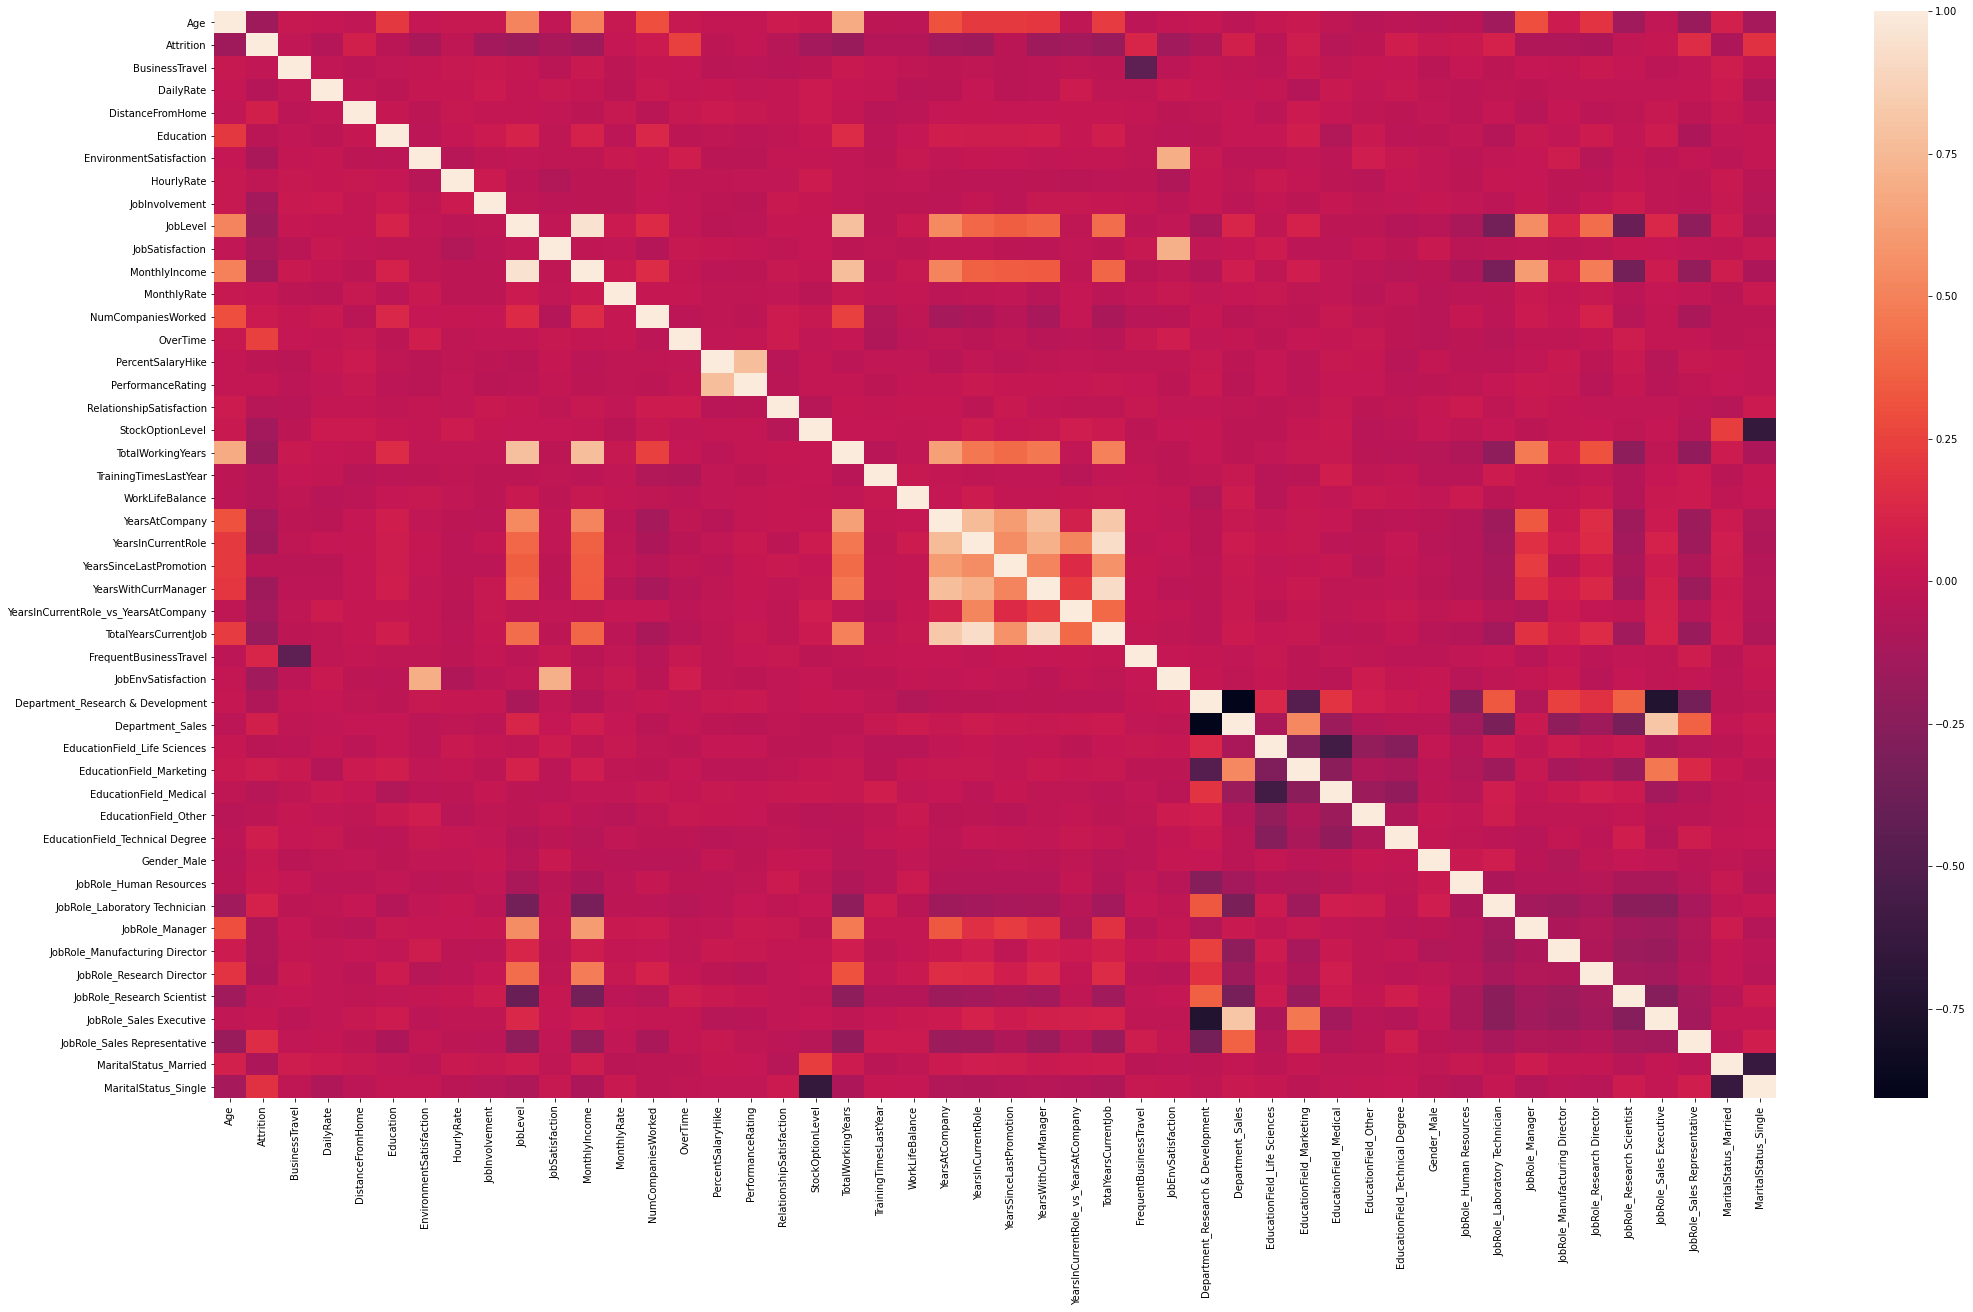

In [39]:
plt.figure(figsize=(35,20))
sns.heatmap(df_final.corr())

In [40]:
df_final.isna().sum()

Age                                     0
Attrition                               0
BusinessTravel                          0
DailyRate                               0
DistanceFromHome                        0
Education                               0
EnvironmentSatisfaction                 0
HourlyRate                              0
JobInvolvement                          0
JobLevel                                0
JobSatisfaction                         0
MonthlyIncome                           0
MonthlyRate                             0
NumCompaniesWorked                      0
OverTime                                0
PercentSalaryHike                       0
PerformanceRating                       0
RelationshipSatisfaction                0
StockOptionLevel                        0
TotalWorkingYears                       0
TrainingTimesLastYear                   0
WorkLifeBalance                         0
YearsAtCompany                          0
YearsInCurrentRole                

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select numeric columns to scale
numeric_columns = df_final.select_dtypes(include=['int64', 'float64']).columns

# Apply the scaler to the numeric columns
df_final[numeric_columns] = scaler.fit_transform(df_final[numeric_columns])

In [42]:
# Seperate target and features
X = df_final.drop('Attrition', axis=1) # all columns except the target column our our independent variables
y = df_final['Attrition']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=df['Attrition'])

In [43]:
# Print the shapes of the resulting DataFrames
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1176, 47)
X_test shape: (294, 47)
y_train shape: (1176,)
y_test shape: (294,)


In [44]:
# Check the class distribution in y_train and y_test
print("Class distribution in y_train:\n", y_train.value_counts())
print("Class distribution in y_test:\n", y_test.value_counts())

Class distribution in y_train:
 0    986
1    190
Name: Attrition, dtype: int64
Class distribution in y_test:
 0    247
1     47
Name: Attrition, dtype: int64


In [45]:
# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Initialize SMOTE and RandomUnderSampler
smote = SMOTE(sampling_strategy=.75, random_state=42)  # Adjust sampling_strategy as needed
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42, replacement=False)  # Adjust sampling_strategy as needed

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply RandomUnderSampler to the training data
X_train_balanced, y_train_balanced = under_sampler.fit_resample(X_train_smote, y_train_smote)
# Print the class distribution after resampling
print("Class distribution before resampling:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())

print("\nClass distribution after SMOTE and undersampling:")
print(y_train_balanced.value_counts())

# Print the shapes of the resulting DataFrames
print(f"\nX_train shape after resampling: {X_train_balanced.shape}")
print(f"y_train shape after resampling: {y_train_balanced.shape}")

Class distribution before resampling:
0    986
1    190
Name: Attrition, dtype: int64

Class distribution after SMOTE:
0    986
1    739
Name: Attrition, dtype: int64

Class distribution after SMOTE and undersampling:
1    739
0    739
Name: Attrition, dtype: int64

X_train shape after resampling: (1478, 47)
y_train shape after resampling: (1478,)



Accuracy Score:
0.7040816326530612

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       247
           1       0.24      0.40      0.30        47

    accuracy                           0.70       294
   macro avg       0.56      0.58      0.56       294
weighted avg       0.77      0.70      0.73       294


Accuracy Score:
0.7040816326530612

Confusion Matrix:
[[188  59]
 [ 28  19]]


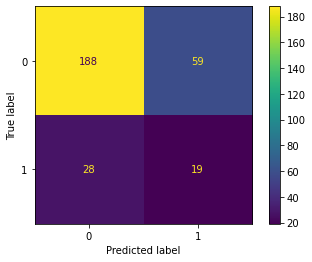

In [46]:
clf_balanced_tree =DecisionTreeClassifier(random_state=42)
clf_balanced_tree.fit(X_train_balanced, y_train_balanced)

y_pred = clf_balanced_tree.predict(X_test)


# Evaluate the classifier
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_balanced_tree.classes_).plot()
plt.show()

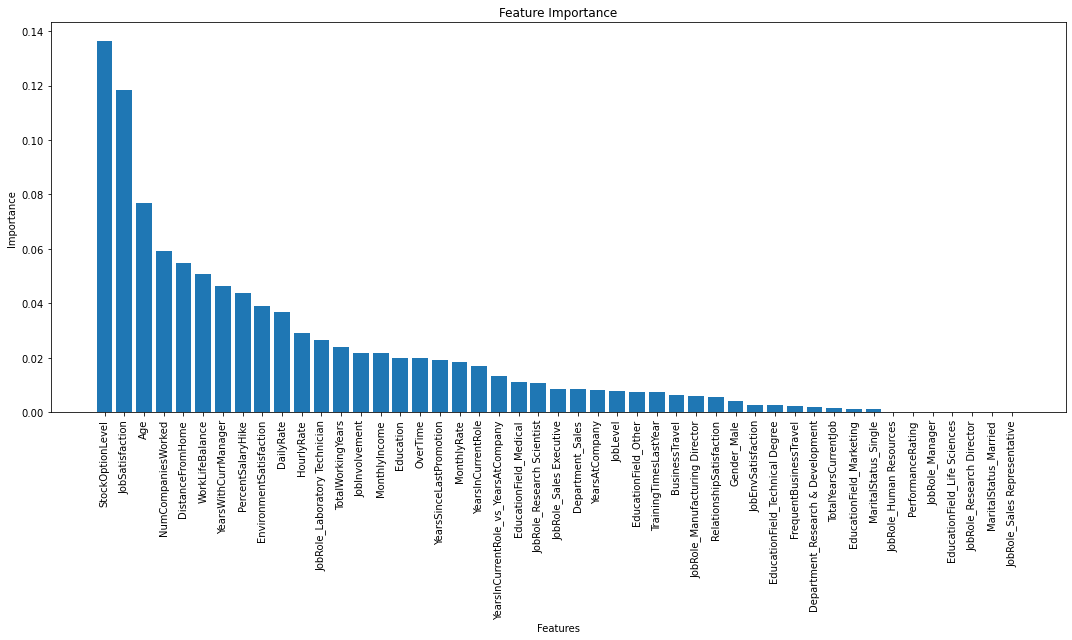

In [47]:
# Get feature importances
feature_importances = clf_balanced_tree.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 9))
plt.bar(range(X_train_balanced.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train_balanced.shape[1]), X_train_balanced.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Best parameters found:  {'class_weight': {0: 1, 1: 5}, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2}

Accuracy Score:
0.47619047619047616

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.46      0.60       247
           1       0.16      0.55      0.25        47

    accuracy                           0.48       294
   macro avg       0.50      0.51      0.42       294
weighted avg       0.74      0.48      0.54       294


Confusion Matrix:
[[114 133]
 [ 21  26]]


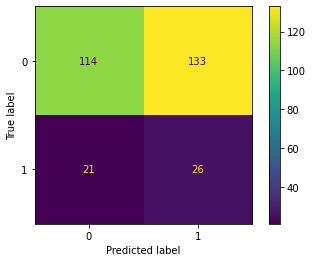

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced', {0: 1, 1: 3}, {0: 1, 1: 5}]  # Adjusted to put more emphasis on class '1'
}

# Initialize the classifier
clf_balanced_treecv = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf_balanced_treecv, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_).plot()
plt.show()



Best parameters found:  {'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}

Accuracy Score:
0.564625850340136

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.57      0.69       247
           1       0.20      0.55      0.29        47

    accuracy                           0.56       294
   macro avg       0.53      0.56      0.49       294
weighted avg       0.76      0.56      0.62       294


Confusion Matrix:
[[140 107]
 [ 21  26]]


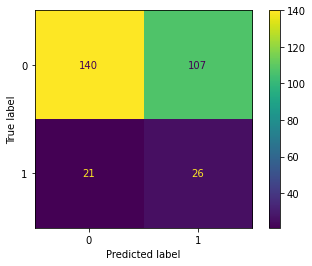

In [49]:
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced', {0: 1, 1: 3}, {0: 1, 1: 5}]  # Adjusted to put more emphasis on class '1'
}

# Initialize the classifier
clf_balanced_tree = DecisionTreeClassifier(random_state=42)

# Create a scorer for F2 score
f2_scorer = make_scorer(fbeta_score, beta=2, average='binary')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf_balanced_tree, param_grid=param_grid, cv=5, scoring=f2_scorer, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_).plot()
plt.show()


# Most Accurate Model


Accuracy Score:
0.8129251700680272
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       247
           1       0.36      0.21      0.27        47

    accuracy                           0.81       294
   macro avg       0.61      0.57      0.58       294
weighted avg       0.78      0.81      0.79       294

Confusion Matrix:
[[229  18]
 [ 37  10]]


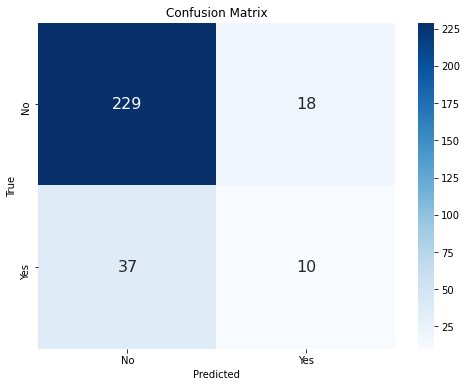

In [50]:
# Example of using SMOTE for oversampling and adjusting class weights
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train your classifier, adjusting class weights if needed
clf_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_rf.fit(X_train_balanced, y_train_balanced)

# Make predictions and evaluate the model
y_pred = clf_rf.predict(X_test)
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16}, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy Score:
0.7040816326530612

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       247
           1       0.24      0.40      0.30        47

    accuracy                           0.70       294
   macro avg       0.56      0.58      0.56       294
weighted avg       0.77      0.70      0.73       294


Confusion Matrix:
[[188  59]
 [ 28  19]]


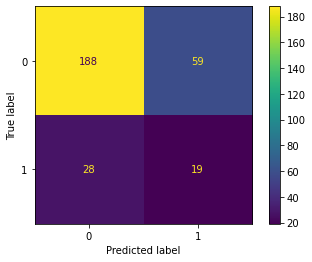

In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming clf_balanced_tree, clf_balanced_treecv, and clf_rf are already trained

# Initialize the Voting Classifier with your existing models
voting_clf = VotingClassifier(estimators=[
    ('baseline', clf_balanced_tree),
    ('finetuned', clf_balanced_treecv),
    ('random_forest', clf_rf)
], voting='soft')

# Fit the Voting Classifier
voting_clf.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the classifier
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_voting))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_voting))

print("\nConfusion Matrix:")
cm_voting = confusion_matrix(y_test, y_pred_voting)
print(cm_voting)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=voting_clf.classes_).plot()
plt.show()



Best parameters found:  {'flatten_transform': True, 'voting': 'soft', 'weights': [1, 1, 3]}

Accuracy Score:
0.7346938775510204

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.83       247
           1       0.28      0.40      0.33        47

    accuracy                           0.73       294
   macro avg       0.58      0.60      0.58       294
weighted avg       0.78      0.73      0.75       294


Confusion Matrix:
[[197  50]
 [ 28  19]]


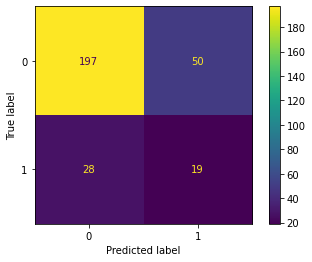

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Assuming clf_balanced_tree, clf_balanced_treecv, and clf_rf are already trained

# Initialize the Voting Classifier with adjusted class weights and hyperparameter tuning
voting_clf = VotingClassifier(estimators=[
    ('baseline', clf_balanced_tree),
    ('finetuned', clf_balanced_treecv),
    ('random_forest', clf_rf)
], voting='soft')

# Define the parameter grid for GridSearchCV
param_grid = {
    'voting': ['soft'],
    'weights': [[1, 1, 1], [1, 2, 1], [1, 1, 2], [1, 3, 1], [1, 1, 3]],  # Adjust weights to emphasize class '1'
    'flatten_transform': [True, False]
}
from sklearn.metrics import make_scorer, recall_score

# Define a custom scoring function emphasizing recall for class '1'
custom_scorer = make_scorer(recall_score, pos_label=1)

# Initialize GridSearchCV with the custom scorer
grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=5, scoring=custom_scorer, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_).plot()
plt.show()


In [53]:
df_final = df_final.drop(columns=[
    'JobRole_Sales Executive',
    'MaritalStatus_Married',
    'YearsInCurrentRole',
    'EducationField_Life Sciences',
    'RelationshipSatisfaction',
    'PerformanceRating',
    'EducationField_Other',
    'JobSatisfaction',
    'OverTime',
    'FrequentBusinessTravel',
    'BusinessTravel',
    'JobRole_Research Director',
    'JobRole_Manager',
    'JobRole_Manufacturing Director'
])

In [54]:
# Seperate target and features
X = df_final.drop('Attrition', axis=1) # all columns except the target column our our independent variables
y = df_final['Attrition']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=df['Attrition'])

In [55]:
# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Initialize SMOTE and RandomUnderSampler
smote = SMOTE(sampling_strategy=.75, random_state=42)  # Adjust sampling_strategy as needed
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42, replacement=False)  # Adjust sampling_strategy as needed

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply RandomUnderSampler to the training data
X_train_balanced, y_train_balanced = under_sampler.fit_resample(X_train_smote, y_train_smote)
# Print the class distribution after resampling
print("Class distribution before resampling:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())

print("\nClass distribution after SMOTE and undersampling:")
print(y_train_balanced.value_counts())

# Print the shapes of the resulting DataFrames
print(f"\nX_train shape after resampling: {X_train_balanced.shape}")
print(f"y_train shape after resampling: {y_train_balanced.shape}")

Class distribution before resampling:
0    986
1    190
Name: Attrition, dtype: int64

Class distribution after SMOTE:
0    986
1    739
Name: Attrition, dtype: int64

Class distribution after SMOTE and undersampling:
1    739
0    739
Name: Attrition, dtype: int64

X_train shape after resampling: (1478, 33)
y_train shape after resampling: (1478,)



Accuracy Score:
0.6972789115646258

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       247
           1       0.22      0.34      0.26        47

    accuracy                           0.70       294
   macro avg       0.54      0.55      0.54       294
weighted avg       0.76      0.70      0.72       294


Accuracy Score:
0.6972789115646258

Confusion Matrix:
[[189  58]
 [ 31  16]]


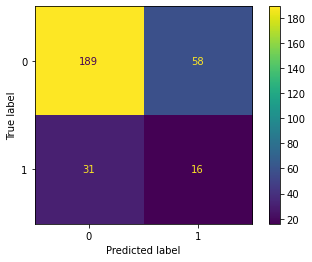

In [56]:
clf =DecisionTreeClassifier(random_state=42)
clf.fit(X_train_balanced, y_train_balanced)

y_pred = clf.predict(X_test)


# Evaluate the classifier
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()
plt.show()


Accuracy Score:
0.8061224489795918
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       247
           1       0.32      0.19      0.24        47

    accuracy                           0.81       294
   macro avg       0.59      0.56      0.56       294
weighted avg       0.77      0.81      0.79       294

Confusion Matrix:
[[228  19]
 [ 38   9]]


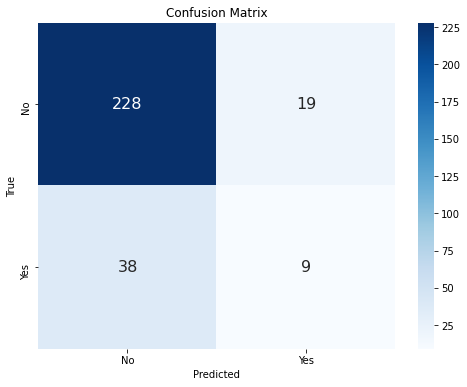

In [57]:
# Example of using SMOTE for oversampling and adjusting class weights
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train your classifier, adjusting class weights if needed
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train_balanced, y_train_balanced)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16}, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tips to Improve Models  
* GridsearchCV
* Play around with SMOTE
* Remove Unimportant Features
* Ensemble on model maxxed on 'yes' and 'no'
* Receiver Operater Characteristic Curve (ROC)- Area Under the Curve (AUC)
* CV Scores

In [58]:
len(y_train_balanced)

1478

In [59]:
len(y_train)

1176

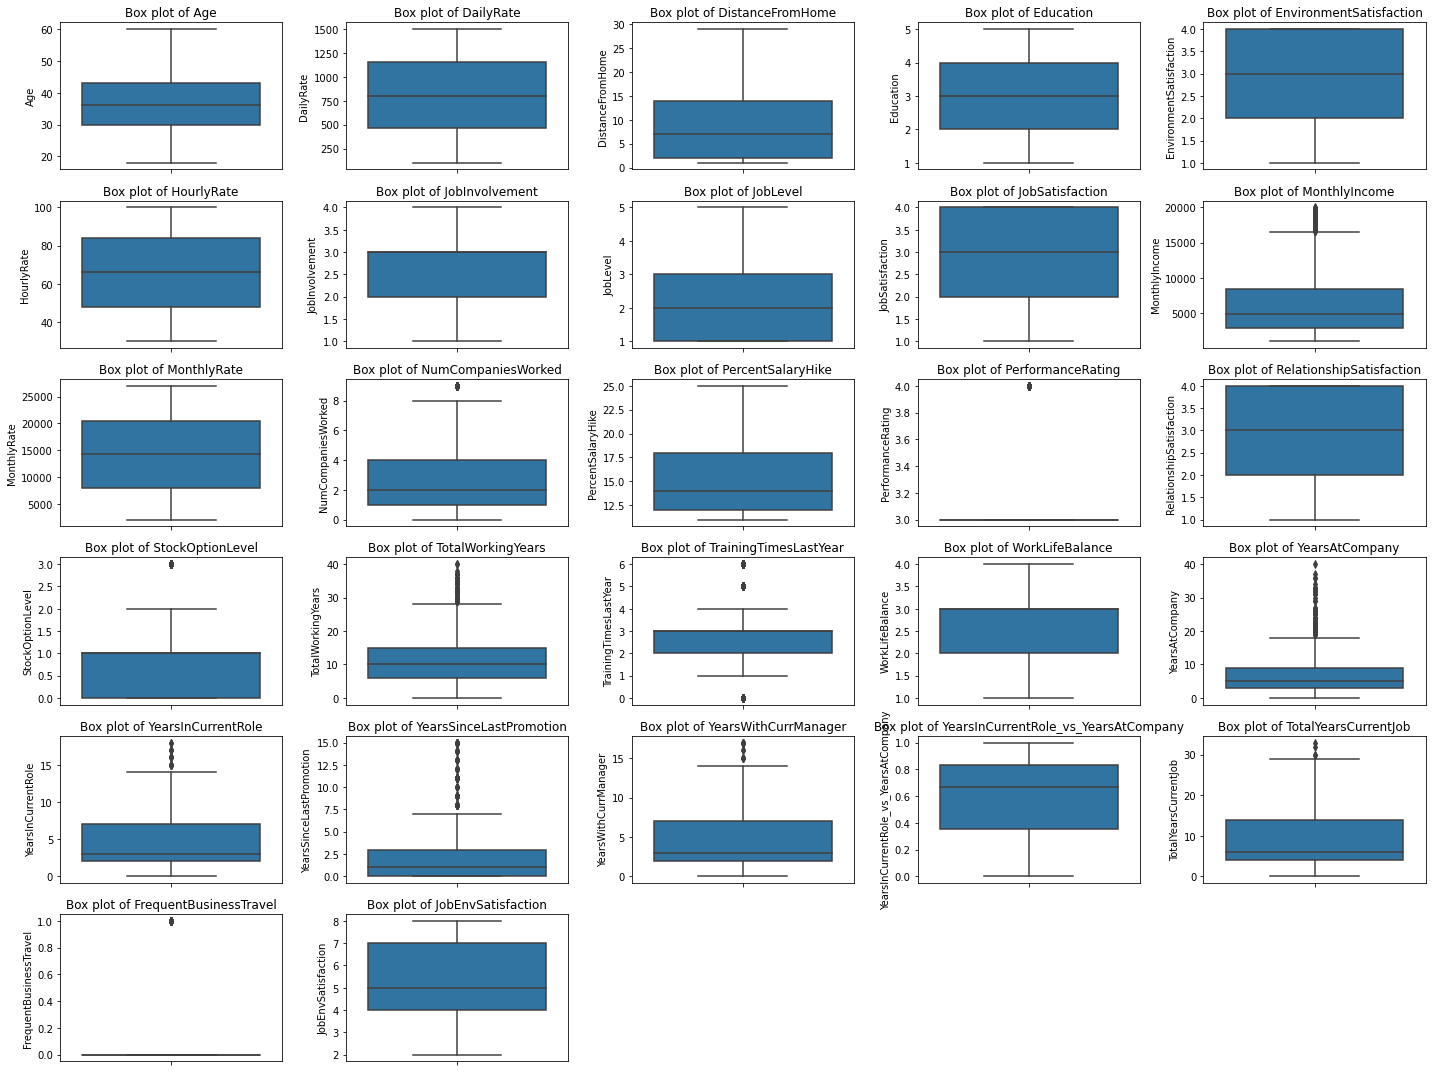

Number of outliers: 486
Original dataset shape: (1470, 35)
Cleaned dataset shape: (984, 35)


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot box plots for each numeric column
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6, 5, i)  # Adjust the layout based on the number of columns
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Adjust the IQR threshold
threshold = 3.0  # Example: use a higher threshold to identify fewer outliers

# Identify outliers using the IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - threshold * IQR)) | (df[numeric_cols] > (Q3 + threshold * IQR))).any(axis=1)
print(f'Number of outliers: {outliers.sum()}')

# Remove outliers
df_clean = df[~outliers]

# Check the shape of the dataset before and after removing outliers
print(f'Original dataset shape: {df.shape}')
print(f'Cleaned dataset shape: {df_clean.shape}')


In [61]:
label_encoder = LabelEncoder()

columns_to_encode = [
    'BusinessTravel',
    'OverTime',
    'Attrition'
]

for column in columns_to_encode:
    df_clean.loc[:, column] = label_encoder.fit_transform(df_clean[column])

# Print df_clean to verify the encoding
df_clean.head()

C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsInCurrentRole_vs_YearsAtCompany,TotalYearsCurrentJob,FrequentBusinessTravel,JobEnvSatisfaction
0,41,1,1,1102,Sales,1,2,Life Sciences,2,Female,...,0,1,6,4,0,5,0.666667,9,0,6
2,37,1,1,1373,Research & Development,2,2,Other,4,Male,...,3,3,0,0,0,0,0.000000,0,0,7
4,27,0,1,591,Research & Development,2,1,Medical,1,Male,...,3,3,2,2,2,2,1.000000,4,0,3
9,36,0,1,1299,Research & Development,27,3,Medical,3,Male,...,3,2,7,7,7,7,1.000000,14,0,6
10,35,0,1,809,Research & Development,16,3,Medical,1,Male,...,5,3,5,4,0,3,0.800000,7,0,3


In [62]:
columns_to_encode = ['Department',
                    'EducationField',
                    'Gender',
                    'JobRole',
                    'MaritalStatus']

# Create an instance of OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the data
encoded_data = ohe.fit_transform(df_clean[columns_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(columns_to_encode))

# Drop the original columns and concatenate the encoded columns
df_encoded = df_clean.drop(columns_to_encode, axis=1).reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
df_cleaned = pd.concat([df_encoded, encoded_df], axis=1)

# Display the DataFrame
df_cleaned

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,2,94,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,37,1,1,1373,2,2,4,92,2,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,27,0,1,591,2,1,1,40,3,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36,0,1,1299,27,3,3,94,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,35,0,1,809,16,3,1,84,4,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,39,0,1,722,24,1,2,60,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
980,31,0,0,325,5,3,2,74,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
981,26,0,1,1167,5,3,4,30,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
982,39,0,1,613,6,1,4,42,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
# Separate target and features
X = df_cleaned.drop('Attrition', axis=1)  # Check df_clean to ensure it's correctly prepared
y = df_cleaned['Attrition']

# Check shapes
print(X.shape)  # Should match the number of rows in df_clean minus 1 (for dropped column)
print(y.shape)  # Should match the number of rows in df_clean

# Split the data into train and test sets
#from sklearn.model_selection import train_test_split
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)


(984, 47)
(984,)


In [64]:
# Print the shapes of the resulting DataFrames
print(f"X_train shape: {X_train_clean.shape}")
print(f"X_test shape: {X_test_clean.shape}")
print(f"y_train shape: {y_train_clean.shape}")
print(f"y_test shape: {y_test_clean.shape}")

X_train shape: (787, 47)
X_test shape: (197, 47)
y_train shape: (787,)
y_test shape: (197,)


In [65]:
# Check the class distribution in y_train and y_test
print("Class distribution in y_train:\n", y_train_clean.value_counts())
print("Class distribution in y_test:\n", y_test_clean.value_counts())

Class distribution in y_train:
 0    678
1    109
Name: Attrition, dtype: int64
Class distribution in y_test:
 0    170
1     27
Name: Attrition, dtype: int64


In [66]:
# Initialize SMOTE and RandomUnderSampler
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust sampling_strategy as needed
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42, replacement=False)  # Adjust sampling_strategy as needed

# Apply SMOTE to the training data
X_train_smote_clean, y_train_smote_clean = smote.fit_resample(X_train_clean, y_train_clean)

# Apply RandomUnderSampler to the training data
X_train_balanced_clean, y_train_balanced_clean = under_sampler.fit_resample(X_train_smote_clean, y_train_smote_clean)
# Print the class distribution after resampling
print("Class distribution before resampling:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())

print("\nClass distribution after SMOTE and undersampling:")
print(y_train_balanced.value_counts())

# Print the shapes of the resulting DataFrames
print(f"\nX_train shape after resampling: {X_train_balanced_clean.shape}")
print(f"y_train shape after resampling: {y_train_balanced_clean.shape}")

Class distribution before resampling:
0    986
1    190
Name: Attrition, dtype: int64

Class distribution after SMOTE:
0    986
1    739
Name: Attrition, dtype: int64

Class distribution after SMOTE and undersampling:
1    739
0    739
Name: Attrition, dtype: int64

X_train shape after resampling: (678, 47)
y_train shape after resampling: (678,)



Accuracy Score:
0.6446700507614214

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       170
           1       0.18      0.44      0.26        27

    accuracy                           0.64       197
   macro avg       0.53      0.56      0.51       197
weighted avg       0.79      0.64      0.70       197


Accuracy Score:
0.6446700507614214

Confusion Matrix:
[[115  55]
 [ 15  12]]


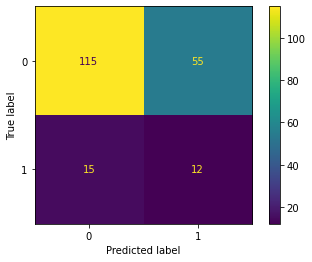

In [67]:
clf_clean =DecisionTreeClassifier(random_state=42)
clf_clean.fit(X_train_balanced_clean, y_train_balanced_clean)

y_pred_clean = clf_clean.predict(X_test_clean)


# Evaluate the classifier
print("\nAccuracy Score:")
print(accuracy_score(y_test_clean, y_pred_clean))
print("\nClassification Report:")
print(classification_report(y_test_clean, y_pred_clean))

print("\nAccuracy Score:")
print(accuracy_score(y_test_clean, y_pred_clean))

print("\nConfusion Matrix:")
cm_clean_tree = confusion_matrix(y_test_clean, y_pred_clean)
print(cm_clean_tree)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_clean_tree, display_labels=clf_clean.classes_).plot()
plt.show()


Accuracy Score:
0.8061224489795918
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       247
           1       0.32      0.19      0.24        47

    accuracy                           0.81       294
   macro avg       0.59      0.56      0.56       294
weighted avg       0.77      0.81      0.79       294

Confusion Matrix:
[[228  19]
 [ 38   9]]


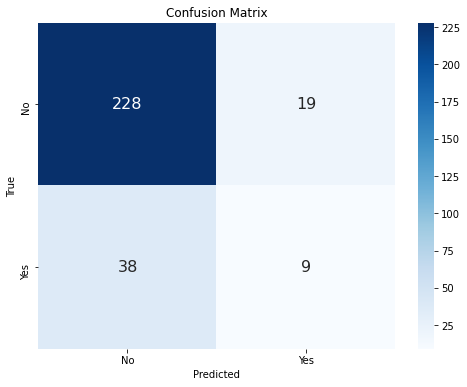

In [68]:
# Example of using SMOTE for oversampling and adjusting class weights
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train your classifier, adjusting class weights if needed
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train_balanced, y_train_balanced)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16}, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()